In [61]:
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
import seaborn as sns 


# Importing dataset

In [62]:
df = pd.read_csv('ad_budget.csv')
df.head(5)  

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [63]:
df.shape

(4572, 5)

# Processing dataset

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [65]:
df = df.drop(['Influencer'], axis = 1)

In [66]:
df = df.dropna()

In [67]:
df.isnull()

,TV,Radio,Social Media,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4567,False,False,False,False
4568,False,False,False,False
4569,False,False,False,False
4570,False,False,False,False


In [68]:
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


# Visualizing dataset

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


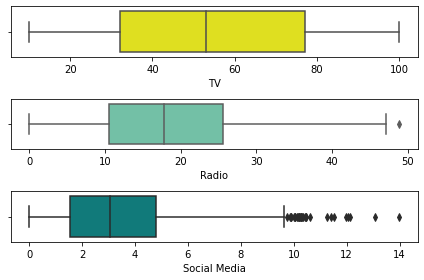

In [69]:
fig, axs = plt.subplots(3, figsize =(6,4))
plt1 = sns.boxplot(df['TV'], ax = axs[0], color = 'yellow')
plt2 =sns.boxplot(df['Radio'], ax = axs[1], color = 'mediumaquamarine')
plt3 =sns.boxplot(df['Social Media'], ax = axs[2], color = 'darkcyan')
plt.tight_layout()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


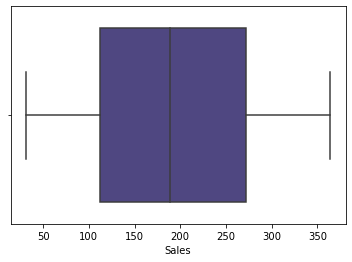

In [70]:
sns.boxplot(df['Sales'], color = 'darkslateblue')
plt.show()

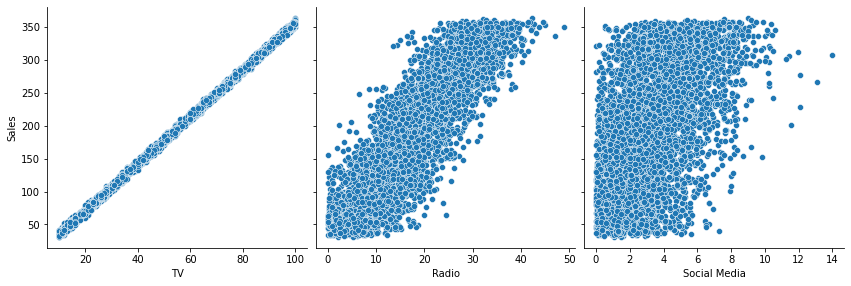

In [71]:
sns.pairplot(df,x_vars = ['TV', 'Radio', 'Social Media'], y_vars = 'Sales', height = 4, aspect = 1, kind = 'scatter')
plt.show()

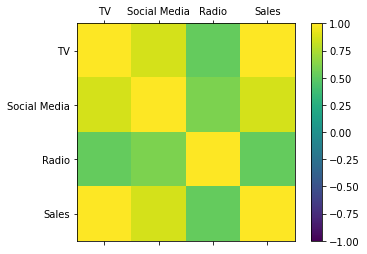

In [72]:
correlation = df.corr()
names = ['TV', 'Social Media', 'Radio', 'Sales']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

# Preparing Features and Labels

In [73]:
X = df.drop(['Sales'], axis = 1).to_numpy()
y = df['Sales'].to_numpy()

In [46]:
from sklearn.model_selection import train_test_split 

X_train, X_rem, y_train, y_rem = train_test_split(
        X, y, test_size=0.5, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.2, random_state=42)


# Training and testing Machine Learning models

## Linear Regression 

### Training error

In [47]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred_train = regr.predict(X_train)

tr_error = mean_squared_error(y_train, y_pred_train)


print('The training error is ', tr_error)



The training error is  8.791817169141236


### Validation error

In [49]:
y_pred_val = regr.predict(X_val)
val_error = mean_squared_error(y_val, y_pred_val)

print('The validation error is ', val_error)


The validation error is  7.997390296381026


### Test error

In [50]:
y_pred_test = regr.predict(X_test)
test_error = mean_squared_error(y_test, y_pred_test)

print('The test error is ', test_error)

The test error is  8.8411714150953


## Polynomial regression

First, polynomial regression models with different polynomial degrees are trained on training dataset. Then, by calculatimg validation errors from different techniques (K-Fold Cross Validation), the optimal poly degree is chosen.

### Training and Validation errors 

In [51]:
degrees = [3, 5, 10]    

tr_errors = []          
val_errors = []
  
for i, degree in enumerate(degrees):    
  
    lin_regr = LinearRegression(fit_intercept=False) 
 
    poly = PolynomialFeatures(degree=degree)    
    X_train_poly = poly.fit_transform(X_train)    
    lin_regr.fit(X_train_poly, y_train)    
 
    y_pred_train = lin_regr.predict(X_train_poly)
    tr_error = mean_squared_error(y_train, y_pred_train)
    X_val_poly = poly.fit_transform(X_val)
    y_pred_val = lin_regr.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_pred_val)
    
    tr_errors.append(tr_error)
    val_errors.append(val_error)
   

In [52]:
print(tr_errors)
print(val_errors)

[8.739030803778675, 8.669393614418945, 93238.10194996397]
[8.081814697238608, 8.183914498100581, 3522318.07597522]


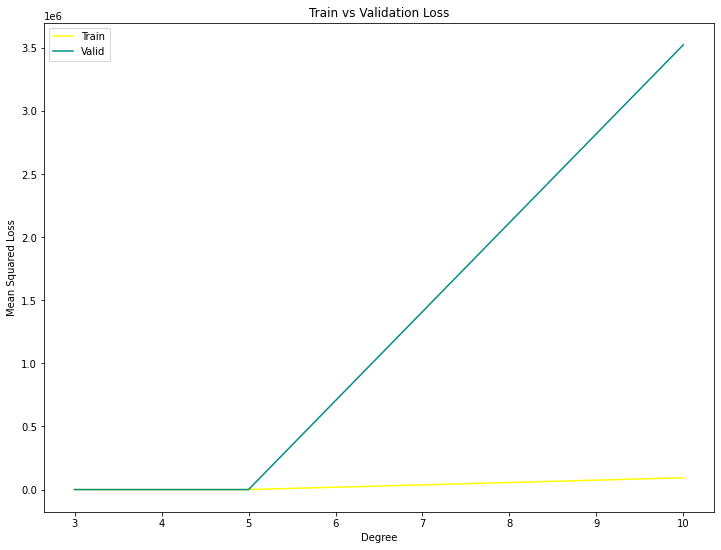

In [53]:
plt.figure(figsize=(12, 9))

plt.plot(degrees, tr_errors, label = 'Train', color = 'yellow')
plt.plot(degrees, val_errors,label = 'Valid', color = 'darkcyan')
plt.legend(loc = 'upper left')

plt.xlabel('Degree')
plt.ylabel('Mean Squared Loss')
plt.title('Train vs Validation Loss')
plt.show()

In [54]:
for i, degree in enumerate(degrees):
    print(f"For polynomial degree {degree}: the training error is {tr_errors[i]}, the validation error is {val_errors[i]}")

For polynomial degree 3: the training error is 8.739030803778675, the validation error is 8.081814697238608
For polynomial degree 5: the training error is 8.669393614418945, the validation error is 8.183914498100581
For polynomial degree 10: the training error is 93238.10194996397, the validation error is 3522318.07597522


### Cross Validation

In [55]:
from sklearn.model_selection import KFold

In [56]:
k, shuffle, seed = 3, True, 42
kfold = KFold(n_splits=k, shuffle=shuffle, random_state=seed)

In [57]:
degrees = [3, 5, 10]    

tr_errors = {}          
val_errors = {}


for i, degree in enumerate(degrees):   
    tr_errors[degree] = [] 
    val_errors[degree] = []
    
    for j, (train_indices, val_indices) in enumerate(kfold.split(X)): 

        
        X_train, y_train, X_val, y_val = X[train_indices], y[train_indices], X[val_indices], y[val_indices]
        
        lin_regr = LinearRegression(fit_intercept=False) 
        poly = PolynomialFeatures(degree=degree)   
        X_train_poly = poly.fit_transform(X_train)   
        lin_regr.fit(X_train_poly, y_train)    

        
        y_pred_train = lin_regr.predict(X_train_poly)    
        tr_error = mean_squared_error(y_train, y_pred_train)    
        X_val_poly = poly.transform(X_val) 
        y_pred_val = lin_regr.predict(X_val_poly) 
        val_error = mean_squared_error(y_val, y_pred_val) 
        
        tr_errors[degree].append(tr_error) 
        val_errors[degree].append(val_error)

In [58]:
tr_errors, val_errors

({3: [8.613377386059836, 8.581110405451424, 8.742419197040144],
  5: [8.544458968191316, 8.48620143447923, 8.625146172979852],
  10: [70854.8551985008, 161286.32931056467, 72438.61252427335]},
 {3: [8.804462961630454, 8.845089894122674, 8.50816078756804],
  5: [8.92169602885427, 8.97759601843698, 8.758916525779474],
  10: [1560101.0450739798, 11218784.365404453, 4025501.9284319207]})

In [59]:
average_train_error, average_val_error = {}, {}
for degree in degrees:
    average_train_error[degree] = np.mean(tr_errors[degree])
    average_val_error[degree] = np.mean(val_errors[degree])
   
    print(f"Degree {degree}, avg train error = {average_train_error[degree]:.5f}, "
          f"avg val error = {average_val_error[degree]:.5f}")

Degree 3, avg train error = 8.64564, avg val error = 8.71924
Degree 5, avg train error = 8.55194, avg val error = 8.88607
Degree 10, avg train error = 101526.59901, avg val error = 5601462.44630


### Final test error

From the validation errors calculated above, it can be seen that the best Polynomial model is with degree of 3. The test error is calculated based on this model. 

In [60]:
lin_regr = LinearRegression(fit_intercept=False) 
 
poly = PolynomialFeatures(degree=3)    
X_train_poly = poly.fit_transform(X_train)    
lin_regr.fit(X_train_poly, y_train)    
    
X_test_poly = poly.fit_transform(X_test)
y_pred_test = lin_regr.predict(X_test_poly) 
test_error = mean_squared_error(y_test, y_pred_test)

print("The test error is: ",test_error)

The test error is:  8.708604749280212
